In [1]:
import sys
import warnings
import datacube
from datacube.storage import masking
from datacube.helpers import ga_pq_fuser
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd
import xarray as xr
from datacube.utils import geometry
from datacube.utils.geometry import CRS
from datacube.helpers import write_geotiff
import os

sys.path.append('../10_Scripts')
import SpatialTools
import gdal
import DEADataHandling
import DEAPlotting
dc = datacube.Datacube(app='Snow monitoring with Landsat')

In [56]:
Snow_sum2016_2018=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/2016_2018_NEWmask_frequency_prop.csv',
#     'results/threshold_02/mask/2016_2018_NEWmask_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
# '/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/2016_2018_NEWmask_frequency_prop.csv'
Snow_sum2014_2015=pd.read_csv('threshold_02/mask/2014_2015_NEWmask_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum2012_2013=pd.read_csv('threshold_02/mask/2012_2013_NEWmask_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum2010_2011=pd.read_csv('threshold_02/mask/2010_2011_NEWmask_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )


Snow_sum2010_2018=pd.concat([
    Snow_sum2010_2011,
                             Snow_sum2012_2013,
                             Snow_sum2014_2015,
    Snow_sum2016_2018])

In [9]:
!pwd

/g/data1a/r78/jt7365/dea-notebooks/SnowOFS/results


In [24]:
Snow_sum2010_2018.keys()

Index(['snow_prop_1800', 'pixel_prop', 'pixel_over_005'], dtype='object')

In [37]:
Snow_sum2008_2009=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2008_2009__frequency_prop.csv' , 
            usecols=[1, 2, 3, 4], index_col=0
           )


Snow_sum2006_2007=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2006_2007__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum2004_2005=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2004_2005__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum2002_2003=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2002_2003__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum2000_2001=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2000_2001__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )


Snow_sum2000_2009=pd.concat([
#     Snow_sum2000_2001,
                             Snow_sum2002_2003,
                             Snow_sum2004_2005,Snow_sum2006_2007,Snow_sum2008_2009])

In [19]:
Snow_sum2000_2009.keys()

Index(['snow_prop_elev', 'pixel_prop', 'pixel_over_005'], dtype='object')

In [14]:
!pwd

/g/data1a/r78/jt7365/dea-notebooks/SnowOFS/results


In [38]:
Snow_sum1998_1999=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2000_2001__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1996_1997=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2000_2001__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1994_1995=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2000_2001__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1992_1993=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2000_2001__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1990_1991=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2000_2001__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )

Snow_sum1987_1989=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/threshold_02/mask/frequency/1800/2000_2001__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )


Snow_sum1990_1999=pd.concat([
    Snow_sum1990_1991,
                             Snow_sum1992_1993,
                             Snow_sum1994_1995,Snow_sum1996_1997,Snow_sum1998_1999])

In [40]:
Snow_sum2010_2018.columns = ['snow_prop', 'pixel_prop', '1800_validpix_v_allpixels']
Snow_sum2000_2009.columns = ['snow_prop', 'pixel_prop', '1800_validpix_v_allpixels']
Snow_sum1990_1999.columns = ['snow_prop', 'pixel_prop', '1800_validpix_v_allpixels']
Snow_sum1987_1989.columns = ['snow_prop', 'pixel_prop', '1800_validpix_v_allpixels']

In [48]:
# lat, lon, buffer_m, buffer_n = -36.86895, 147.276, 30000, 30000 #vic
# lat, lon, buffer_m, buffer_n = -41.56728, 147.67106, 10000, 10000 #tas ben lomond
#lat1, lon1, buffer_m1 = -36.435, 148.29, 8000
# Set range of time to return data from both Landsat and Sentinel 2
lat, lon, buffer_m, buffer_n = -36.3, 148.35, 30000, 40000
time_range = ('2017-01-12', '2017-01-15')
resolution = (-25, 25)
# landsat_goodquality_prop = 0.70
x, y = geometry.point(lon, lat, CRS('WGS84')).to_crs(CRS('EPSG:3577')).points[0]
query = {'x': (x - buffer_m, x + buffer_m),
         'y': (y - buffer_n, y + buffer_n),    
         'time': time_range,
         'crs': 'EPSG:3577',
         'output_crs': 'EPSG:3577',
         'resolution': resolution} 

landsat_ds = DEADataHandling.load_clearlandsat(dc=dc, 
                                               product = 'nbar',
                                               query=query,
                                               sensors=['ls5','ls7','ls8'],
                                               bands_of_interest=['red', 'green', 'blue','nir', 'swir1'],
                                               masked_prop=landsat_goodquality_prop,
                                               mask_pixel_quality=False,
                                               ls7_slc_off=True)
elevation_query = {'x': (x - buffer_m, x + buffer_m),
         'y': (y - buffer_n, y + buffer_n),    
         #'time': time_range,
         'crs': 'EPSG:3577',
         'output_crs': 'EPSG:3577',
         'resolution': resolution} 

elevation_data = dc.load(product='srtm_dem1sv1_0', **elevation_query)
elevation_2d = elevation_data.dem_h.squeeze('time')
contour_gdf_1800 = SpatialTools.contour_extract(z_values=1800,
                                            ds_array=elevation_2d,
                                            ds_crs=elevation_2d.geobox.crs,
                                            ds_affine=elevation_2d.geobox.affine,
                                            output_shp='extracted_vic_contours_1800.shp')
contour_gdf_1500 = SpatialTools.contour_extract(z_values=1500,
                                            ds_array=elevation_2d,
                                            ds_crs=elevation_2d.geobox.crs,
                                            ds_affine=elevation_2d.geobox.affine,
                                            output_shp='extracted_vic_contours_1500.shp')
contour_gdf_1200 = SpatialTools.contour_extract(z_values=1200,
                                            ds_array=elevation_2d,
                                            ds_crs=elevation_2d.geobox.crs,
                                            ds_affine=elevation_2d.geobox.affine,
                                            output_shp='extracted_vic_contours_1200.shp')

NameError: name 'DEADataHandling' is not defined

In [41]:
dfs = [(Snow_sum2010_2018, 2010), 
       (Snow_sum2000_2009, 2000),
       (Snow_sum1990_1999, 1990),
        (Snow_sum1987_1989, 1980)
      ]

In [46]:
for i, j in dfs:
    i['20_50'] = np.where(i['snow_prop'] > 0.05, i['snow_prop'], np.nan)
    i['under_20%'] = np.where(i['1800_validpix_v_allpixels'] < 0.2, i['snow_prop'], np.nan)
    i['over_60%'] = np.where(i['1800_validpix_v_allpixels'] > 0.6, i['snow_prop'], np.nan)
#     i['50_70%'] = np.where(i['pixel_rel'] < 0.4, i['snow_prop_1800'], np.nan)
#     i['50_70%'] = np.where(i['pixel_rel'] < 0.4, np.nan, i['50_70%'])
#     i['30_50%'] = np.where(i['pixel_rel'] < 0.4, i['snow_prop_1800'], np.nan)
#     i['30_50%'] = np.where(i['pixel_rel'] < 0.3, np.nan, i['30_50%'])

In [73]:
#Snow_sum2010_2018

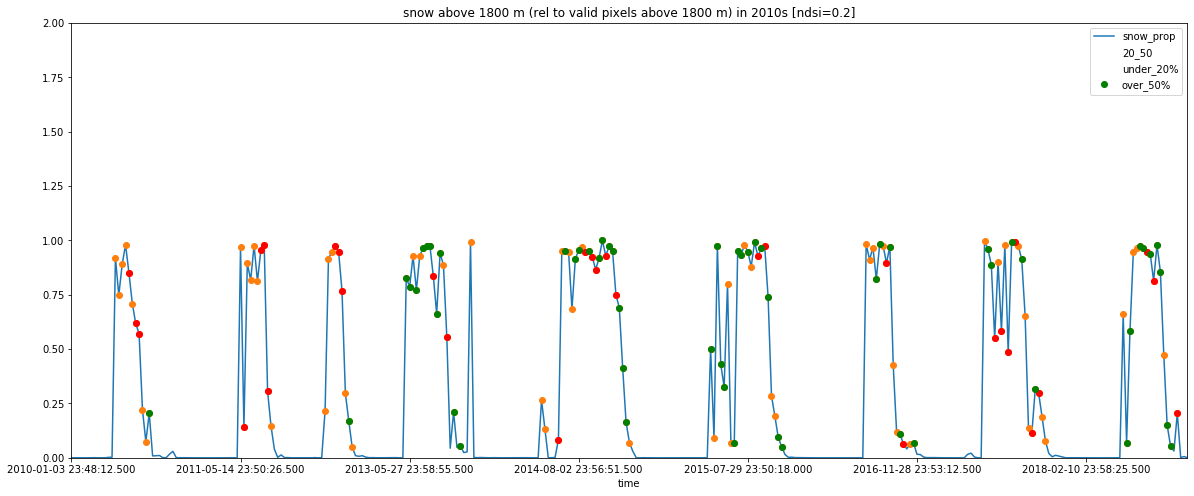

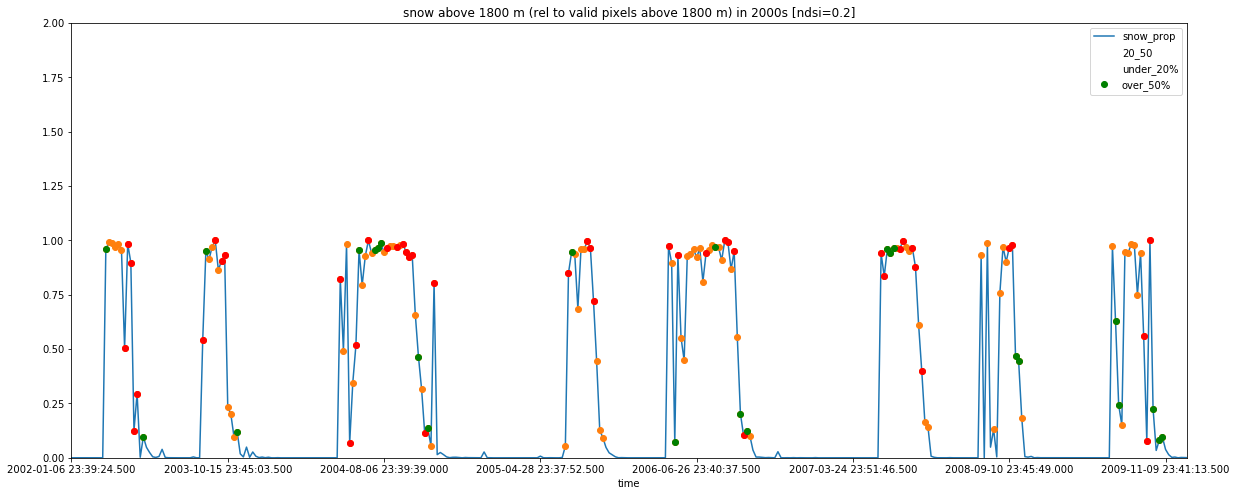

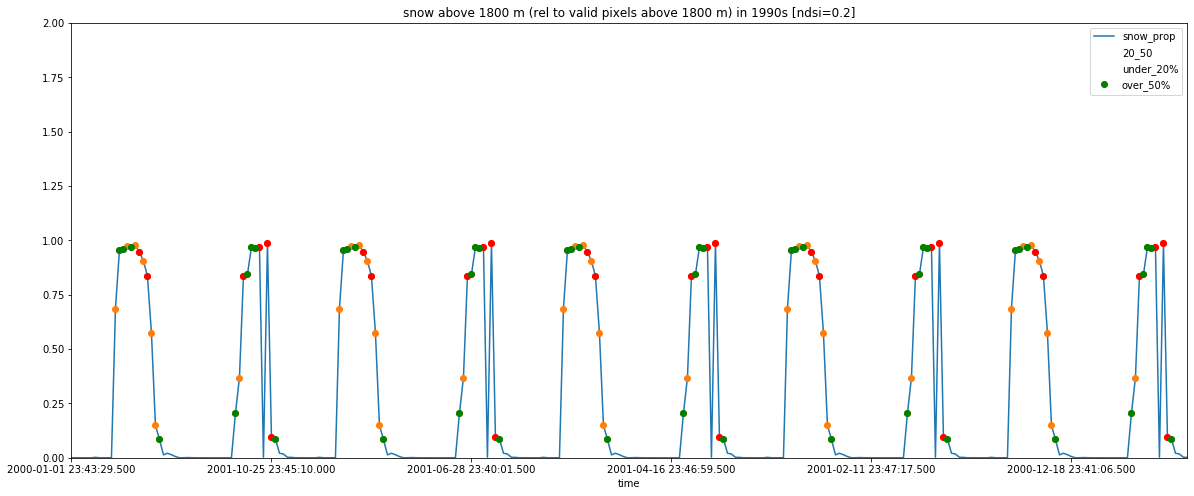

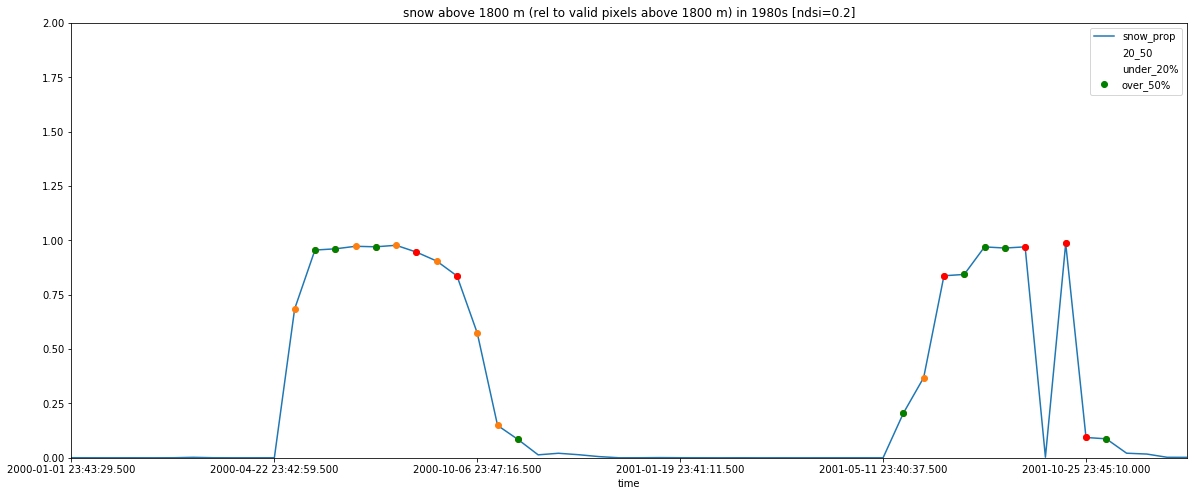

In [47]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("2010nbar_acca_snow_frequency_NSW.pdf")
years = mdates.YearLocator()
months = mdates.MonthLocator() 
years_fmt = mdates.DateFormatter('%Y')

for i,j in dfs:
    fig, ax = plt.subplots(figsize=(20,8)) 
    b = i.plot(y='snow_prop', ylim=(0,2),ax=ax, title='snow above 1800 m (rel to valid pixels above 1800 m) in '+str(j)+'s [ndsi=0.2]')
    b = i.plot(y='20_50',style='o', ax=ax)
    
    b = i.plot(y='under_20%',style='ro', ax=ax)
    b = i.plot(y='over_60%', style='go', ax=ax)
   
 
#     b.xaxis.set_major_formatter(years_fmt)
#     b.xaxis.set_minor_locator(months)
    
# #     b.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#     b.xaxis.set_ticks( i.index[:-4], minor=True)
#     b.tick_params(axis='x', which='minor', direction='in', pad=-10)
    #plt.xticks[:-10]
    #plt.xticks(rotation=65)
    
#     b.xaxis.set_major_locator(mdates.YearLocator())
#     b.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    pdf.savefig()
pdf.close()

In [ ]:
for i, j in dfs:
    i['30_70'] = np.where(i['snow_prop'] > 0.05, i['snow_prop'], np.nan)
    i['under_30%'] = np.where(i['1800_validpix_v_allpixels'] < 0.3, i['snow_prop'], np.nan)
    i['over_70%'] = np.where(i['1800_validpix_v_allpixels'] > 0.7, i['snow_prop'], np.nan)
    i['50_70%'] = np.where(i['1800_validpix_v_allpixels'] < 0.7, i['snow_prop'], np.nan)
    i['50_70%'] = np.where(i['1800_validpix_v_allpixels'] < 0.5, np.nan, i['50_70%'])
    i['30_50%'] = np.where(i['1800_validpix_v_allpixels'] < 0.5, i['snow_prop'], np.nan)
    i['30_50%'] = np.where(i['1800_validpix_v_allpixels'] < 0.3, np.nan, i['30_50%'])

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("snow_frequency_NSW.pdf")
year = [2010, 2000, 1990, 1980]
for i,j in dfs:
    fig, ax = plt.subplots(figsize=(18,8)) 
    b = i.plot(y='snow_prop', ylim=(0,1),ax=ax, title='snow (prop of valid pixels) in '+str(j)+'s [ndsi=0.2]')
    b = i.plot(y='under_30%',style='ro', ax=ax)
    b = i.plot(y='30_50%',style='o', ax=ax)
    b = i.plot(y='50_70%',style='bo', ax=ax)
    b = i.plot(y='over_70%', style='go', ax=ax)
    pdf.savefig()
pdf.close()